In [1]:
import pandas as pd
import ta
from ta.trend import SMAIndicator, EMAIndicator, MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochRSIIndicator, WilliamsRIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.volume import OnBalanceVolumeIndicator, ChaikinMoneyFlowIndicator
from ta.others import CumulativeReturnIndicator
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ticker = "AAPL"
file_path = f"stocks/{ticker}.csv"

In [62]:
df = pd.read_csv(file_path)

In [63]:
df['Date'] = pd.to_datetime(df['Date'])
df['returns'] = df['Close'].pct_change()
df['5_day_returns'] = df['Close'].pct_change(periods=4)
df['10_day_returns'] = df['Close'].pct_change(periods=9)

In [64]:
df = df.drop(['Open', 'Adj Close'], axis=1)

In [68]:
df.head(10)

,Date,High,Low,Close,Volume,returns,5_day_returns,10_day_returns,SMA
0,2014-10-17,24.750000,24.202499,24.417500,272718800,0.021399,0.073308,0.095321,NaN
1,2014-10-20,24.990000,24.555000,24.940001,310069200,0.027165,0.054731,0.082598,NaN
2,2014-10-21,25.754999,25.317499,25.617500,378495600,0.005075,0.025764,0.067630,NaN
3,2014-10-22,26.027500,25.650000,25.747499,273052400,0.017866,0.036411,0.054471,NaN
4,2014-10-23,26.262501,25.907499,26.207500,284298800,0.003720,0.023943,0.038443,0.968654
5,2014-10-24,26.372499,26.132500,26.305000,188215600,-0.001045,0.016727,0.033074,0.979415
6,2014-10-27,26.370001,26.174999,26.277500,136750800,0.015508,0.027495,0.037104,0.990619
7,2014-10-28,26.684999,26.337500,26.684999,192243600,0.005621,0.024920,0.019580,0.983493
8,2014-10-29,26.842501,26.590000,26.834999,210751600,-0.003354,0.011738,0.021986,0.986100
9,2014-10-30,26.837500,26.475000,26.745001,162619200,0.009534,0.017573,0.039914,0.993438


In [66]:
df["5_day_returns"] = df["5_day_returns"].shift(-4)
df["returns"] = df["returns"].shift(-1)
df["10_day_returns"] = df["10_day_returns"].shift(-9)

In [67]:
# Simple Moving Average (SMA)
sma_indicator = ta.trend.SMAIndicator(df['Close'], 5, fillna=False)
df['SMA'] = sma_indicator.sma_indicator() / df['Close']

In [70]:
sma_corr = df['SMA'].corr(df['5_day_returns'])
print(sma_corr)

0.03951068960919352


In [71]:
# Exponential Moving Average (EMA)
ema_indicator = EMAIndicator(df['Close'], 5, fillna=False)
df['EMA'] = ema_indicator.ema_indicator() / df['Close']

In [72]:
# Moving Average Convergence Divergence
macd_indicator = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=False)
df['MACD_PCT'] = macd_indicator.macd() / df['Close']
df['MACD_SIGNAL_PCT'] = macd_indicator.macd_signal() / df['Close']

In [73]:
# Average Directional Index (ADX)
adx_indicator = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
df['ADX'] = adx_indicator.adx()  # Already a strength indicator (0-100), no division by 'Close'

In [74]:
# Relative Strength Index (RSI)
rsi_indicator = RSIIndicator(close=df['Close'], window=14, fillna=False)
df['RSI'] = rsi_indicator.rsi()  # Already a percentage (0-100)

In [75]:
# Stochastic RSI
stoch_rsi_indicator = StochRSIIndicator(close=df['Close'], window=14, smooth1=3, smooth2=3, fillna=False)
df['STOCH_RSI'] = stoch_rsi_indicator.stochrsi()  # Already a percentage (0-1)

In [76]:
# Williams %R
williams_r = WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14, fillna=False)
df['WILLIAMS_R'] = williams_r.williams_r()  # Already a percentage (-100 to 0)

In [77]:
# Bollinger Bands (Middle Band as percentage)
bb_indicator = BollingerBands(close=df['Close'], window=20, window_dev=2, fillna=False)
df['Bollinger_Middle_PCT'] = bb_indicator.bollinger_mavg() / df['Close']
df['Bollinger_Upper_PCT'] = bb_indicator.bollinger_hband() / df['Close']
df['Bollinger_Lower_PCT'] = bb_indicator.bollinger_lband() / df['Close']

In [78]:
# Average True Range (ATR)
atr_indicator = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
df['ATR_PCT'] = atr_indicator.average_true_range() / df['Close']

In [79]:
# On-Balance Volume (OBV)
obv_indicator = OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume'], fillna=False)
df['OBV'] = obv_indicator.on_balance_volume()  # Not a price percentage

In [80]:
# Chaikin Money Flow (CMF)
cmf_indicator = ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=20, fillna=False)
df['CMF'] = cmf_indicator.chaikin_money_flow()  # Already a ratio (-1 to 1)

In [81]:
# Cumulative Returns
cumulative_return = CumulativeReturnIndicator(close=df['Close'], fillna=False)
df['CUMULATIVE_RETURN_PCT'] = cumulative_return.cumulative_return()  # Already a percentage

In [84]:
sma_corr = df['SMA'].corr(df['5_day_returns'])
print(sma_corr)

0.03951068960919352


In [88]:
correlation_matrix = df.corr()

In [89]:
print(correlation_matrix)

                           Date      High       Low     Close    Volume  \
Date                   1.000000  0.944240  0.943921  0.944104 -0.566936   
High                   0.944240  1.000000  0.999809  0.999855 -0.518213   
Low                    0.943921  0.999809  1.000000  0.999854 -0.525255   
Close                  0.944104  0.999855  0.999854  1.000000 -0.522021   
Volume                -0.566936 -0.518213 -0.525255 -0.522021  1.000000   
returns                0.005408 -0.012615 -0.012139 -0.013115  0.013521   
5_day_returns          0.013353 -0.023087 -0.022842 -0.023411  0.015385   
10_day_returns         0.022334 -0.034225 -0.033527 -0.034211 -0.037558   
SMA                   -0.010426 -0.017561 -0.020759 -0.025208  0.139043   
EMA                   -0.011830 -0.021711 -0.025274 -0.029728  0.156875   
MACD_PCT               0.042341  0.084005  0.087707  0.085986 -0.212376   
MACD_SIGNAL_PCT        0.048966  0.092809  0.095626  0.093890 -0.188564   
ADX                   -0.

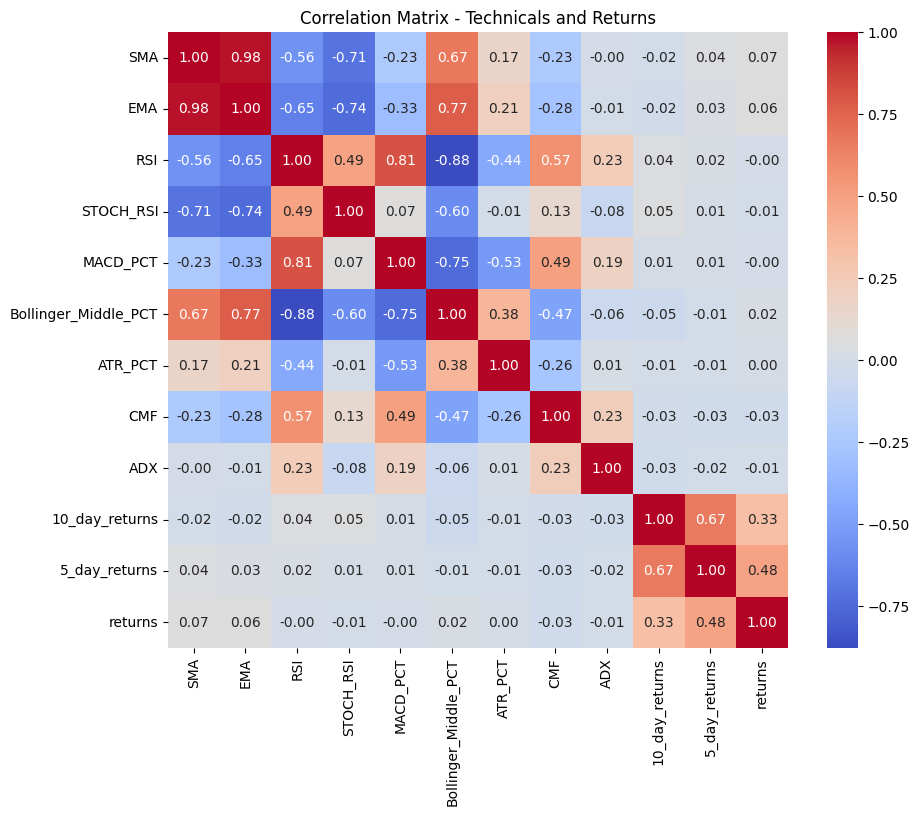

In [91]:
columns_of_interest = [
    'SMA', 'EMA', 'RSI', 'STOCH_RSI', 'MACD_PCT',
    'Bollinger_Middle_PCT', 'ATR_PCT', 'CMF', 'ADX', '10_day_returns', '5_day_returns', 'returns']

subset_correlation_matrix = correlation_matrix.loc[columns_of_interest, columns_of_interest]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix - Technicals and Returns")
plt.show()

In [92]:
technical_indicators = [
    'SMA', 'EMA', 'RSI', 'STOCH_RSI', 'MACD_PCT',
    'Bollinger_Middle_PCT', 'ATR_PCT', 'CMF', 'ADX']

target_columns = ['10_day_returns', '5_day_returns', 'returns']

columns_of_interest = technical_indicators + target_columns

filtered_df = df[columns_of_interest]

correlation_matrix = filtered_df.corr()

correlations_with_targets = correlation_matrix[target_columns]

print(correlations_with_targets)

                      10_day_returns  5_day_returns   returns
SMA                        -0.016451       0.039511  0.067164
EMA                        -0.024800       0.031414  0.061707
RSI                         0.040163       0.023526 -0.000634
STOCH_RSI                   0.052698       0.008990 -0.007127
MACD_PCT                    0.008831       0.009881 -0.003124
Bollinger_Middle_PCT       -0.054101      -0.014815  0.023730
ATR_PCT                    -0.011149      -0.008001  0.003394
CMF                        -0.026127      -0.027654 -0.028844
ADX                        -0.028874      -0.015895 -0.006090
10_day_returns              1.000000       0.667500  0.325374
5_day_returns               0.667500       1.000000  0.483829
returns                     0.325374       0.483829  1.000000
